# Seismic Signals notebook

In [127]:
import pandas

## Load signal from csv file

We have 3 seismic sensors SM-24 connected to the ADS1256 24-bit analog to digital converter.

In [128]:
filename="data/signal.output"

In [129]:
import os

res = os.stat(filename)

f'{res.st_size / ( 1024 * 1024 )} MB'

'1.440652847290039 MB'

<AxesSubplot:>

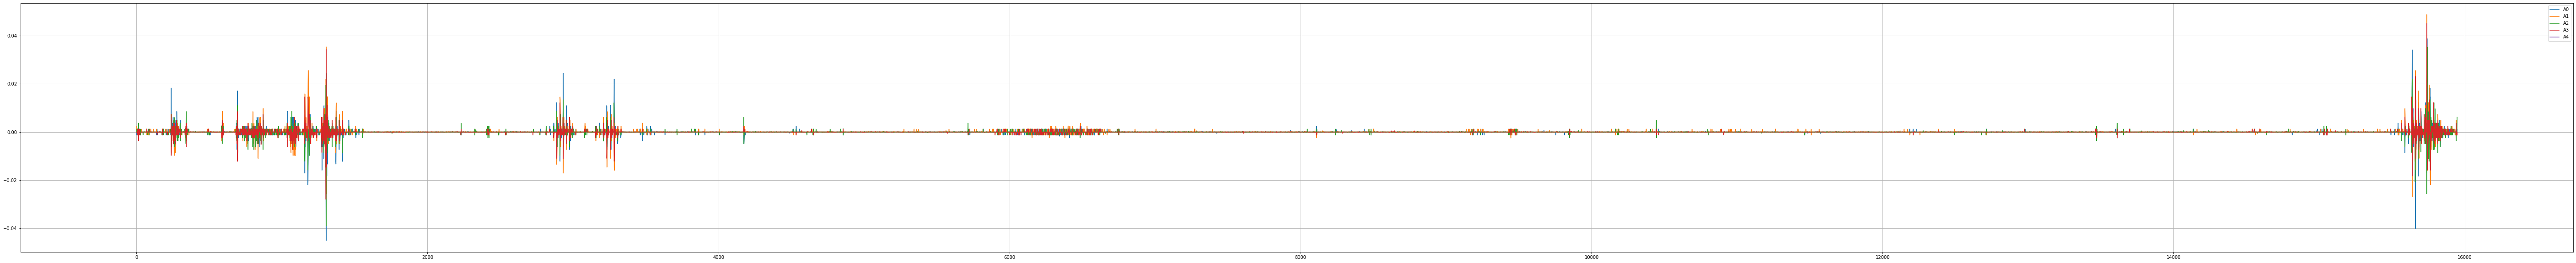

In [130]:
columns = ['time','A0',"A1","A2","A3","A4"]
pd = pandas.read_csv(filename, names=columns, skip_blank_lines=True)

pd[['A0','A1','A2','A3',"A4"]].plot(figsize=[100,10], grid=True)

In [131]:
pd

time            A0            A1            A2  \
0      1616340164298228377  9.778888e-07 -1.673587e-05 -3.784895e-05   
1      1616340164323616463 -8.028002e-06  1.862645e-07 -3.614463e-05   
2      1616340164348860073 -1.219167e-03  2.423954e-03  1.146570e-03   
3      1616340164374090505  7.543714e-07  1.212834e-03  1.145788e-03   
4      1616340164399327343  2.887100e-07  2.514571e-07  1.239628e-03   
...                    ...           ...           ...           ...   
15944  1616340566721252585  1.222361e-03  1.358986e-03  1.203930e-03   
15945  1616340566746478310 -7.481315e-05 -3.695488e-05  4.749746e-07   
15946  1616340566771703774  1.154840e-06 -1.219390e-03  1.462177e-06   
15947  1616340566796930644 -1.220014e-03  1.190603e-04  9.462238e-06   
15948  1616340566822157879  1.145154e-03 -1.257472e-03  6.104252e-03   

                 A3  A4  
0     -7.431024e-05 NaN  
1      1.816079e-06 NaN  
2      7.543714e-07 NaN  
3     -3.721565e-05 NaN  
4     -3.769994e-05 NaN  
...             ...  ..  
15944 -1.219222e-03 NaN  
15945 -1.683831e-05 NaN  
15946 -1.219260e-03 NaN  
15947 -3.682450e-05 NaN  
15948 -1.256485e-03 NaN  

[15949 rows x 6 columns]

In [132]:
df2 = pandas.to_datetime(pd['time'])

df2[1] - df2[0]

Timedelta('0 days 00:00:00.025388086')

<AxesSubplot:>

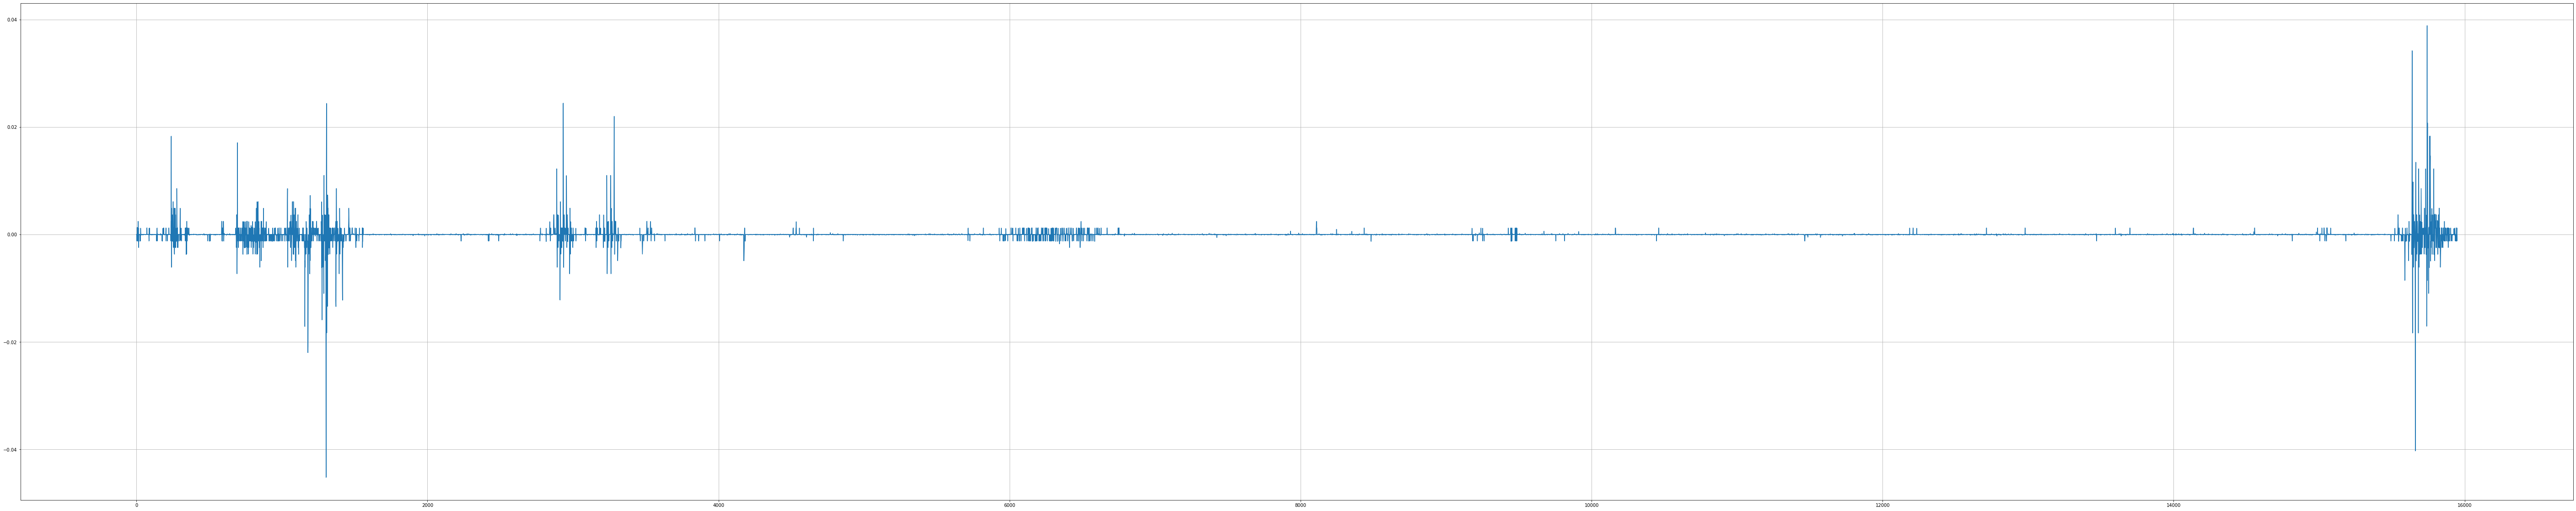

In [133]:
pd["A0"].plot(figsize=[100,20], grid=True)

<AxesSubplot:>

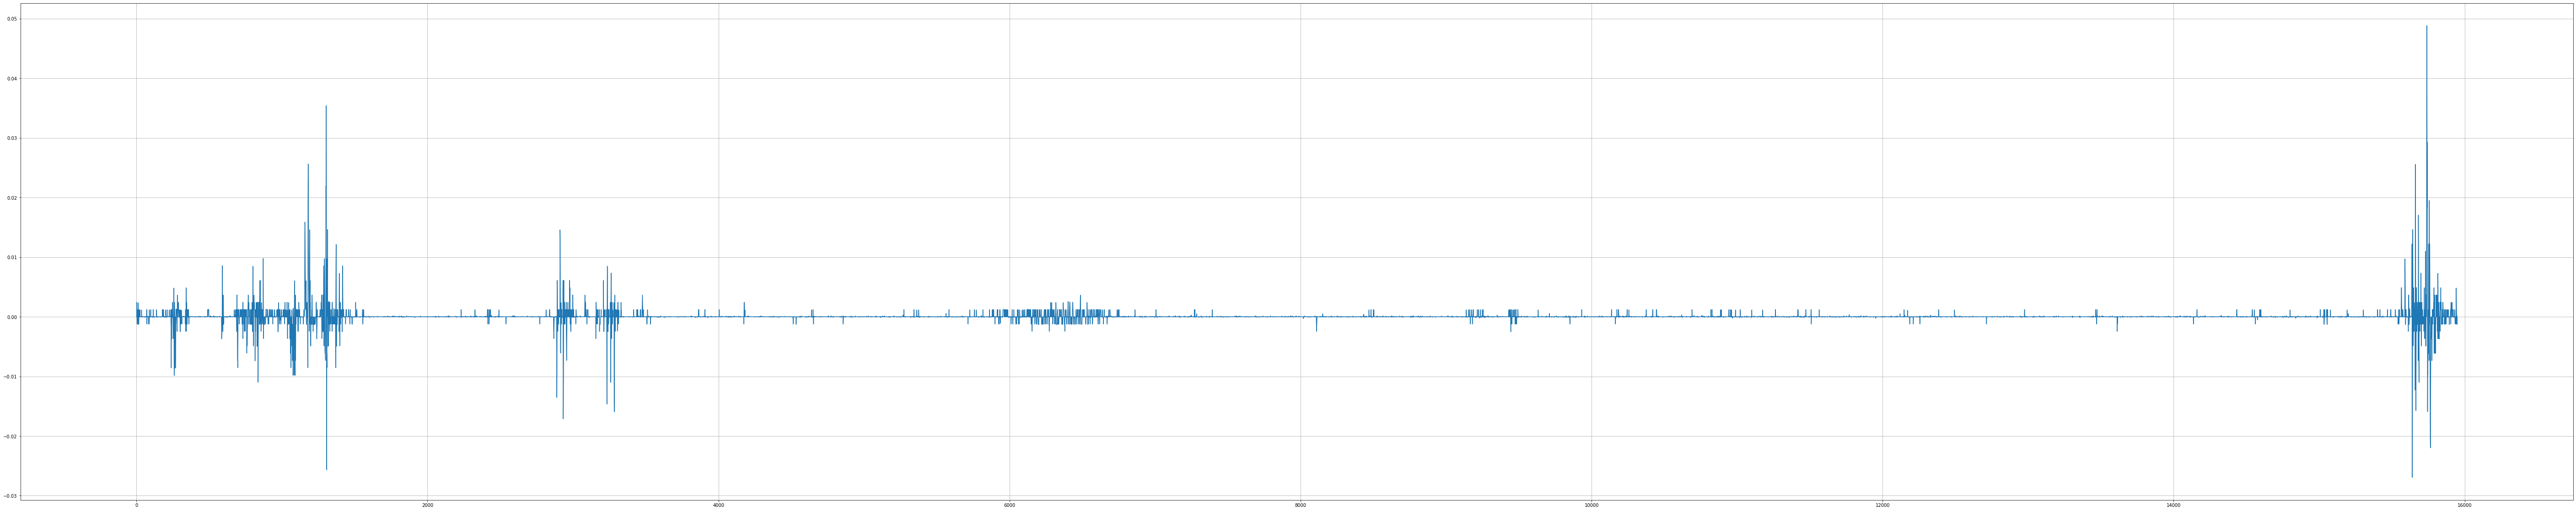

In [134]:
pd["A1"].plot(figsize=[100,20], grid=True)

<AxesSubplot:>

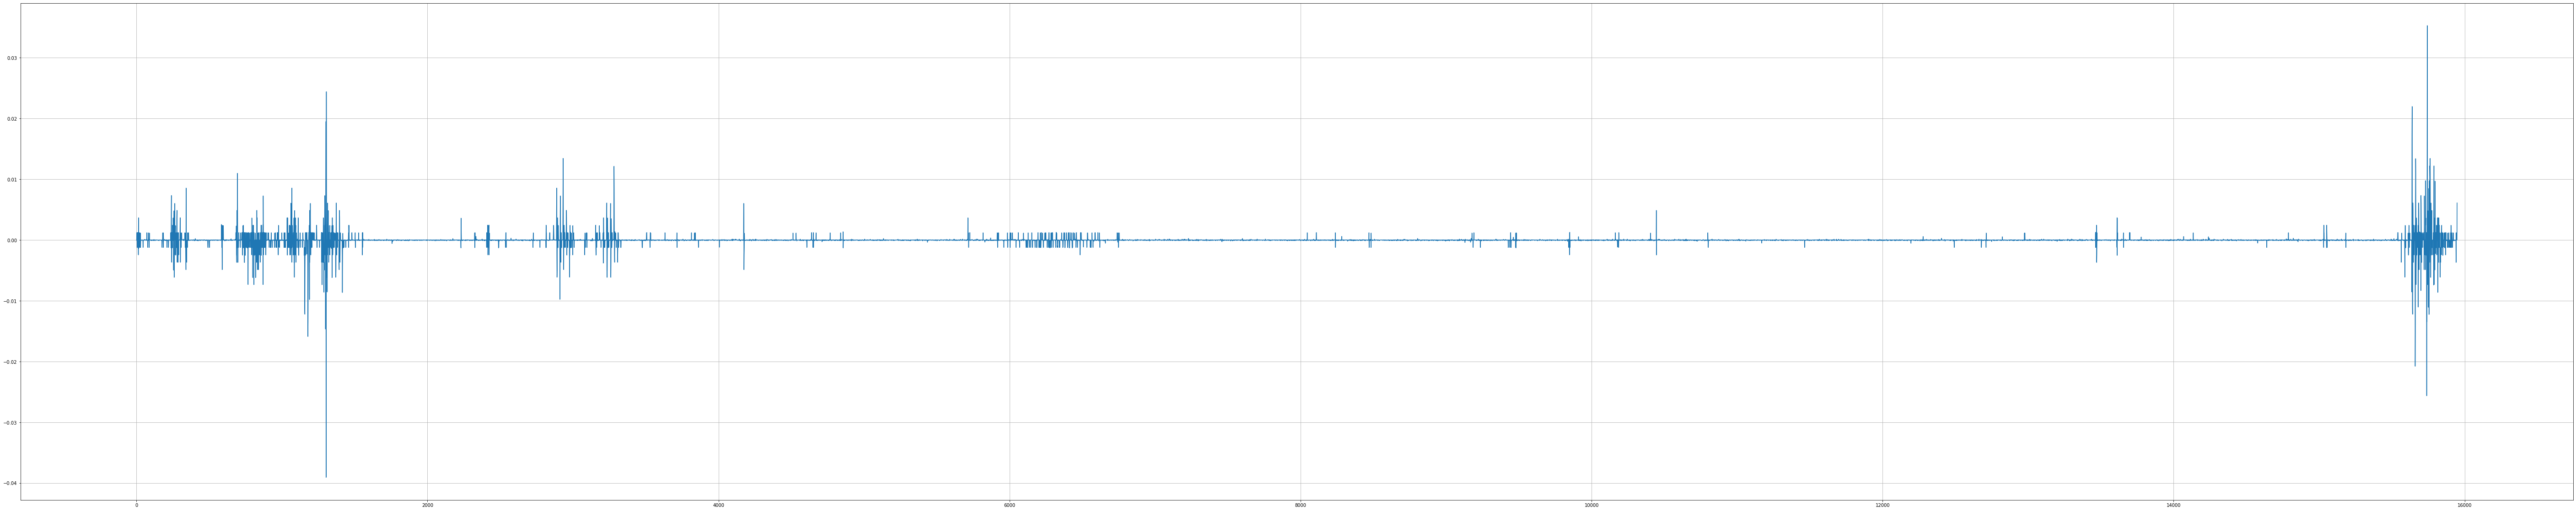

In [135]:
pd["A2"].plot(figsize=[100,20], grid=True)

<AxesSubplot:>

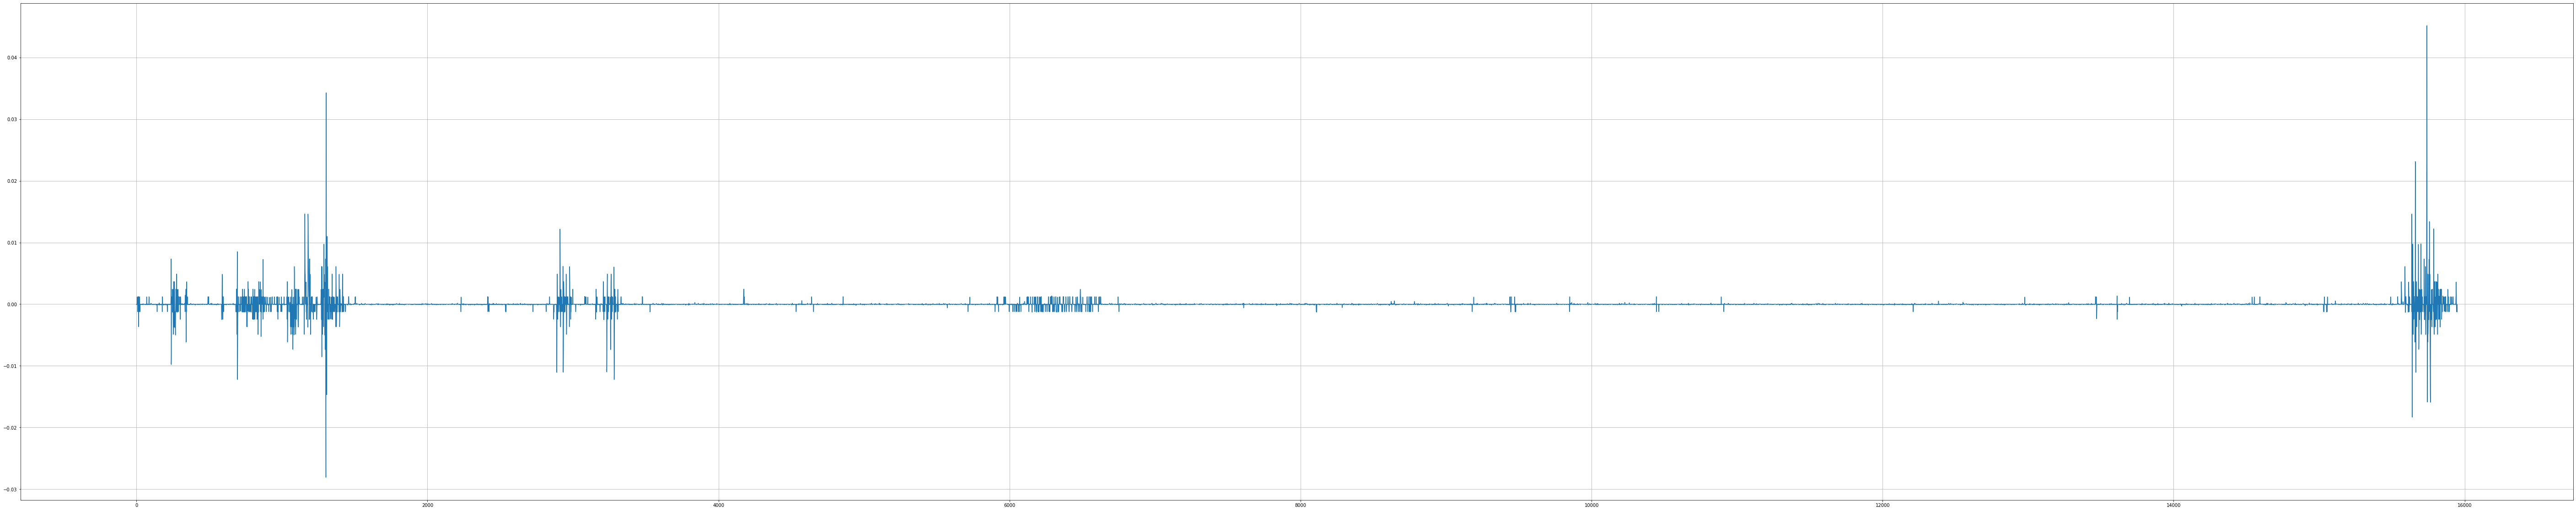

In [136]:
pd["A3"].plot(figsize=[100,20], grid=True)

<AxesSubplot:>

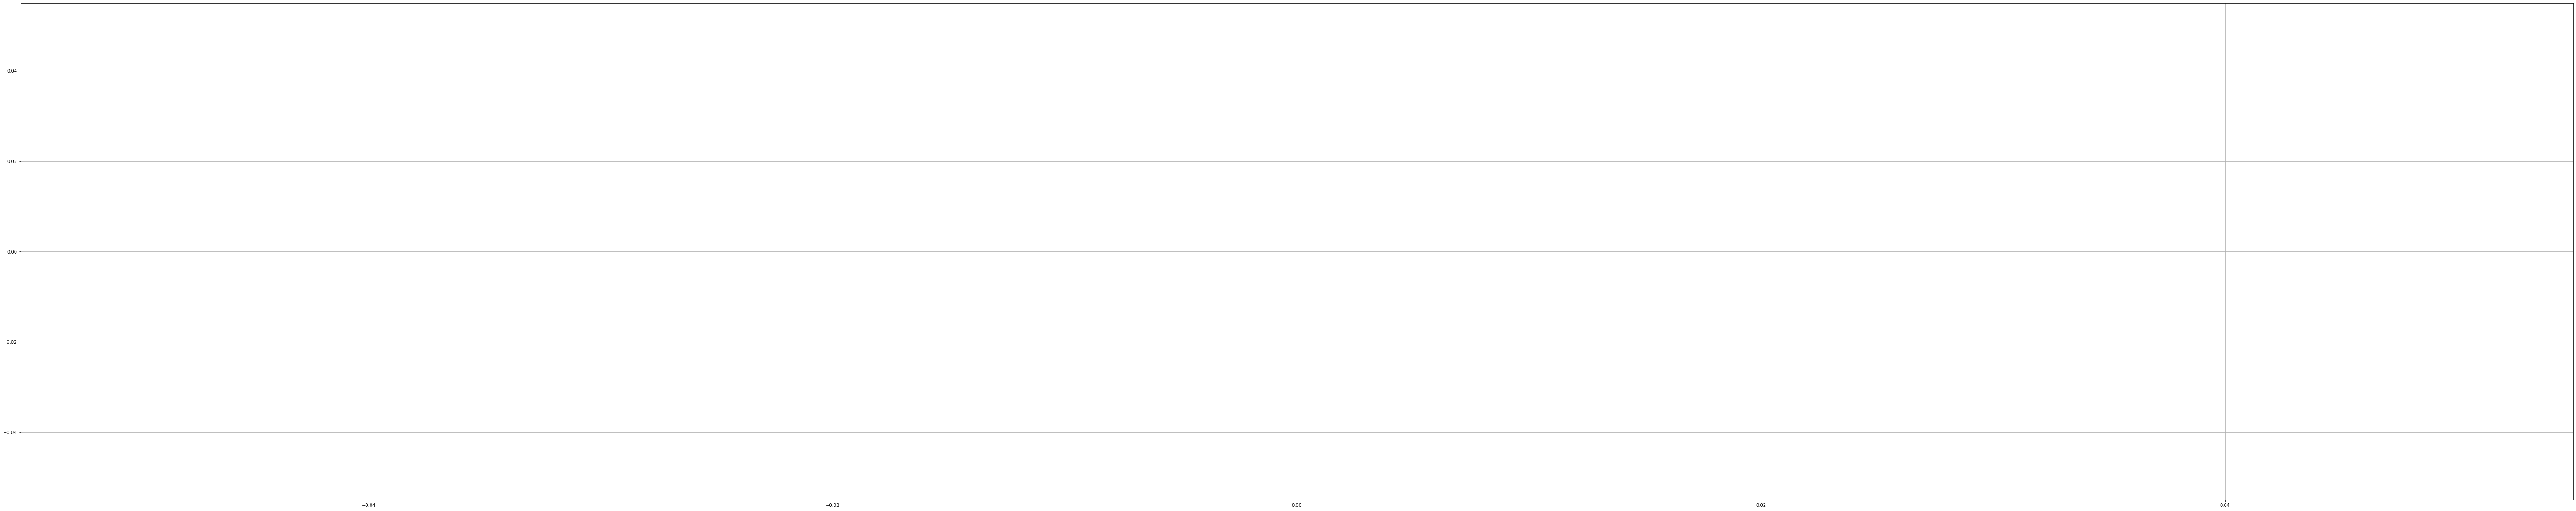

In [137]:
pd["A4"].plot(figsize=[100,20], grid=True)

# Fourier Transformation

In [138]:
import numpy as np
from scipy.signal import blackman
from scipy.fftpack import fft,fftfreq

In [139]:
def draw_fft(column):
    from matplotlib.pyplot import figure
    import matplotlib.pyplot as plt
    figure(num=None, figsize=(100, 15), dpi=80, facecolor='w', edgecolor='k')

    # Number of samples in normalized_tone
    N = pd[column].size

    yf = fft(pd[column].values)
    xf = fftfreq(N, 1 / 15000)

    plt.plot(xf, np.abs(yf))
    plt.grid()
    plt.show()

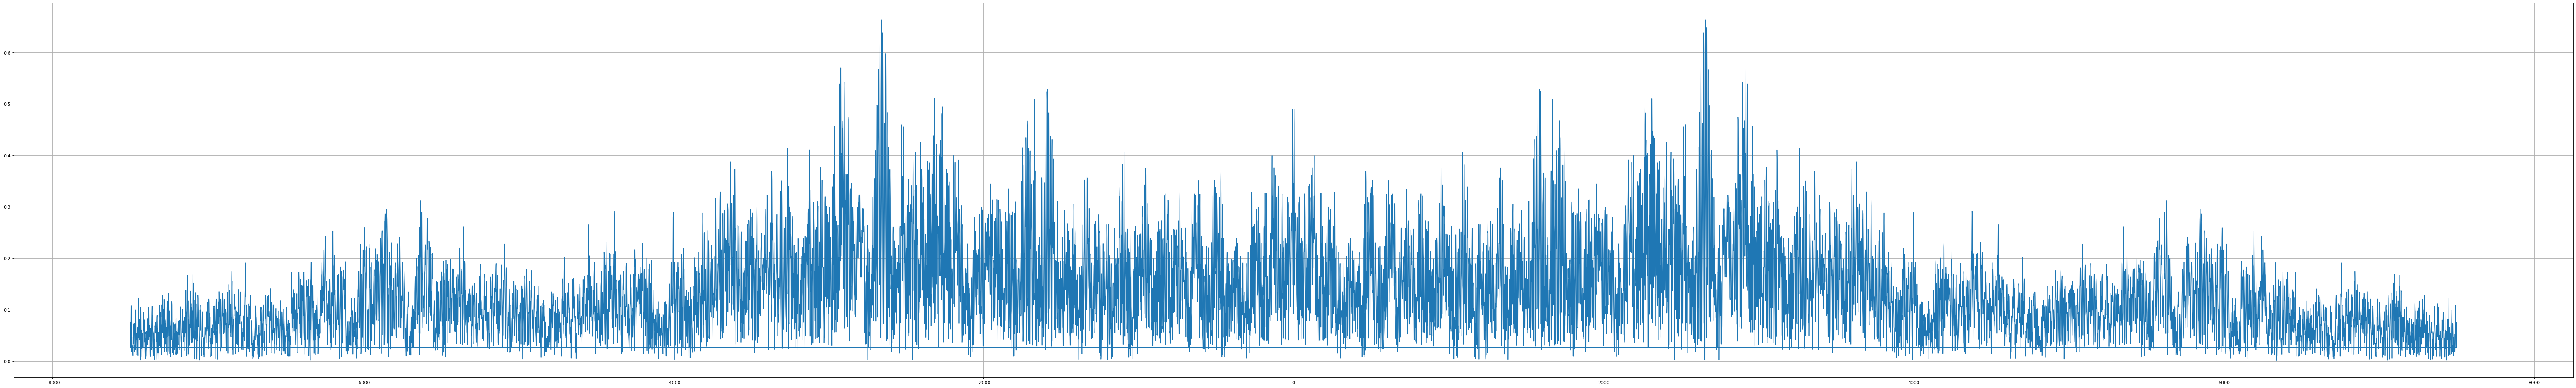

In [140]:
draw_fft(column='A0')

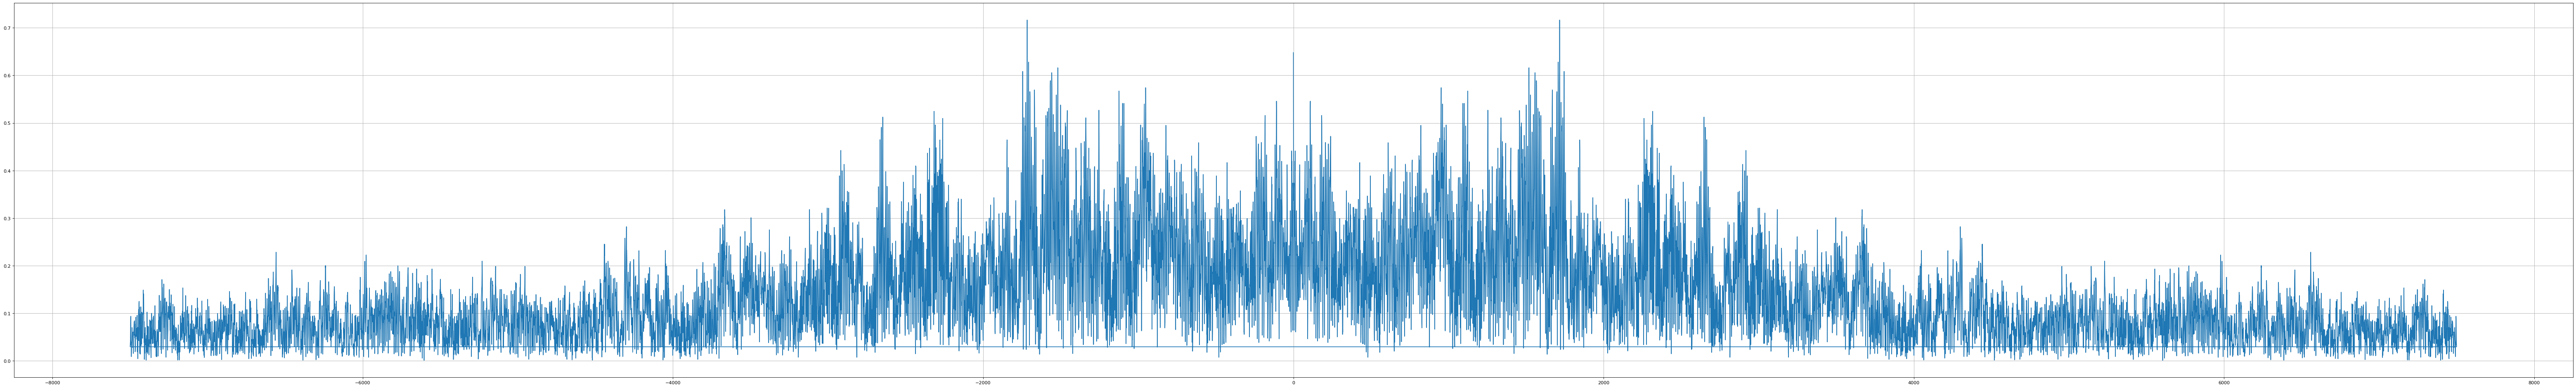

In [141]:
draw_fft(column='A1')

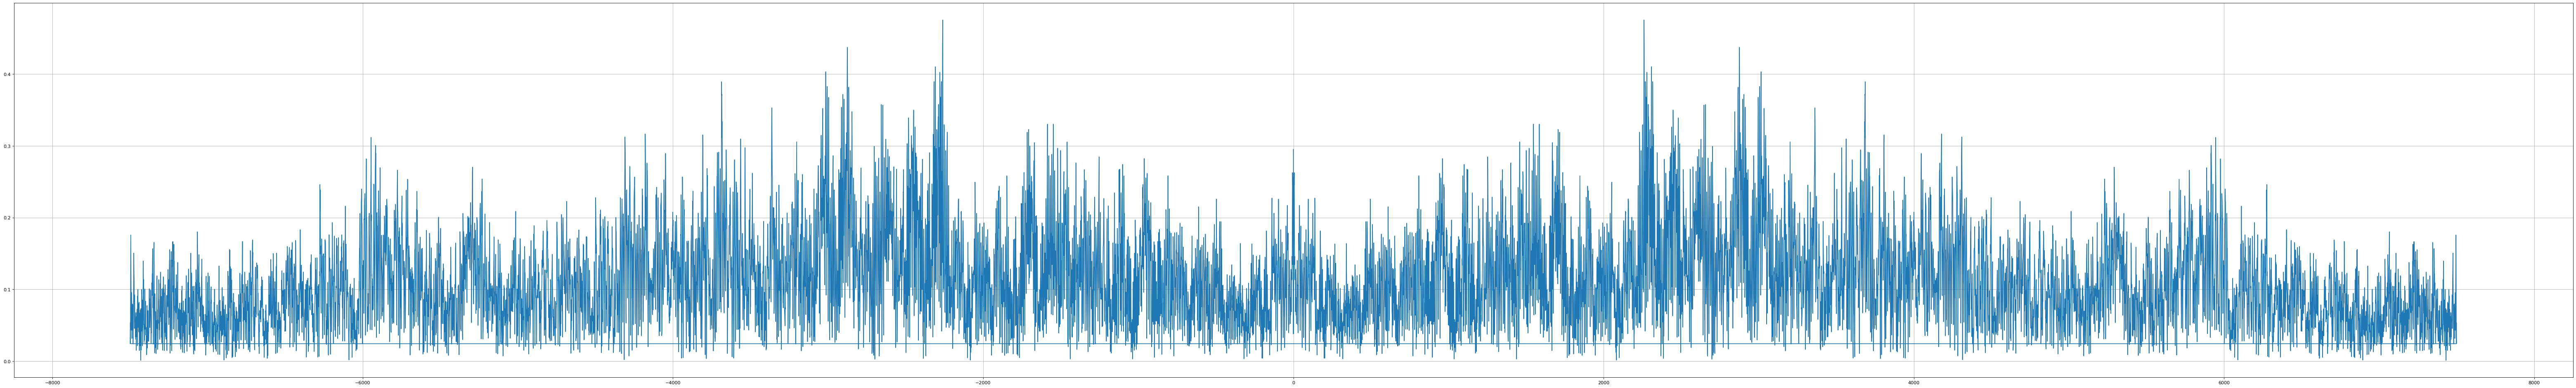

In [142]:
draw_fft(column='A2')

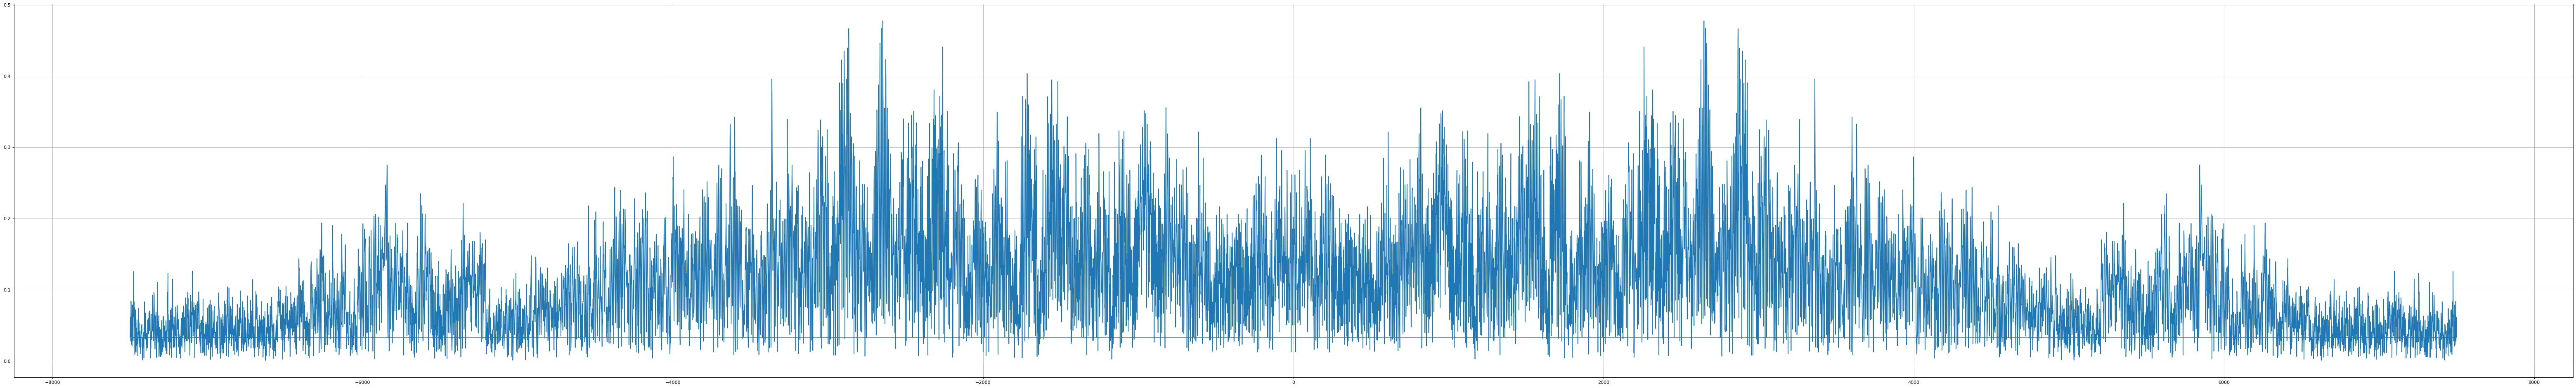

In [143]:
draw_fft(column='A3')

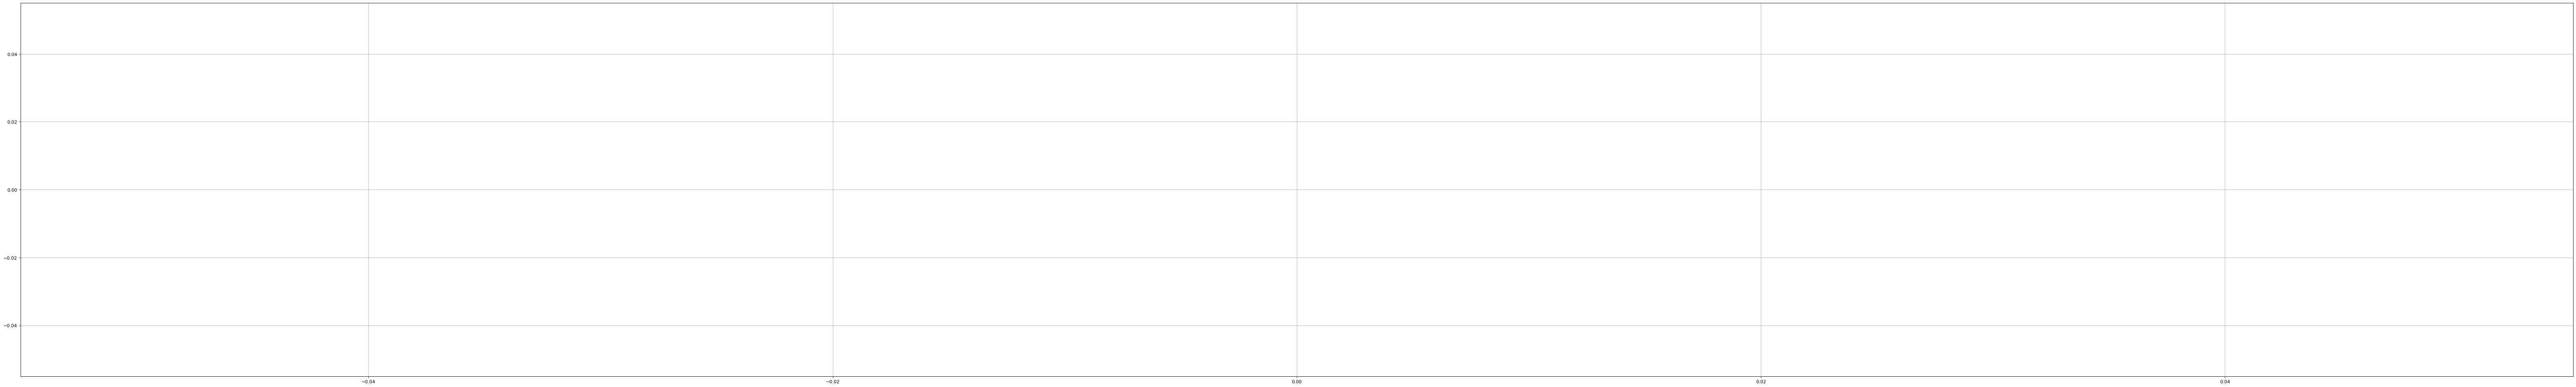

In [17]:
draw_fft(column='A4')